Introduction

Banks and other financial services firms face a serious problem with customer attrition. A bank's earnings and image may suffer when a customer departs. Thus, for banks to continue growing and being profitable, churn prediction is crucial.

Part 1: Data Exploration and Preprocessing

Importing essential libaries

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Import data
data = pd.read_csv("C:/Users/Sagar/Downloads/data/BankChurners.csv")

In [4]:
#Display first few row of dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
# Display basic statistics
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
#Check for missing values
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
# Print the total number of duplicated entries 
data.duplicated().sum()

0

In [9]:
#Data Preprocessing

We did not remove any data from the dataset. However, the final two pieces of information—data, columns, and attributes—are omitted because they are not utilized in the analysis.

Removed information:

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2



In [10]:
data = data.iloc[:, :-2]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
#Unknown Values in variable
print("Uknown: {} and {}".format((data[
    (data["Education_Level"] == "Unknown") | 
   (data["Marital_Status"] == "Unknown") | 
   (data["Income_Category"] == "Unknown")].shape[0]), data.shape[0]))

Uknown: 3046 and 10127


The "Unknown" category is in one or more variables. Rather than deleting it, it is important to keep this category because it can contain a significant amount of information useful for analysis. However, when coding a categorical variable containing this category, it is possible to use an ordinal coder to convert it to a numeric variable. 

Part 2: Data Analysis and Visualization

1. Customer Demographics Analysis

C:\Users\Sagar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


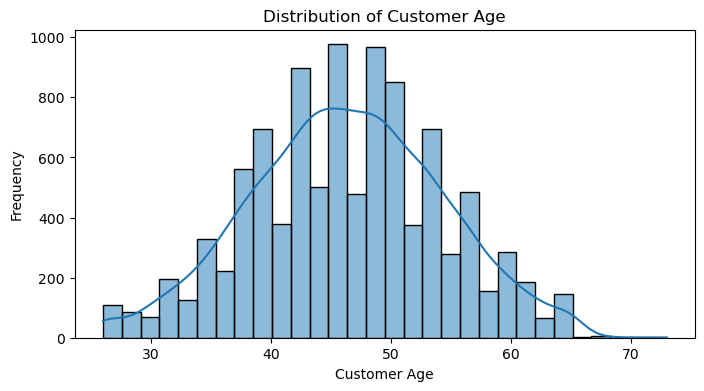

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Customer_Age'], bins=30, kde=True)  
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

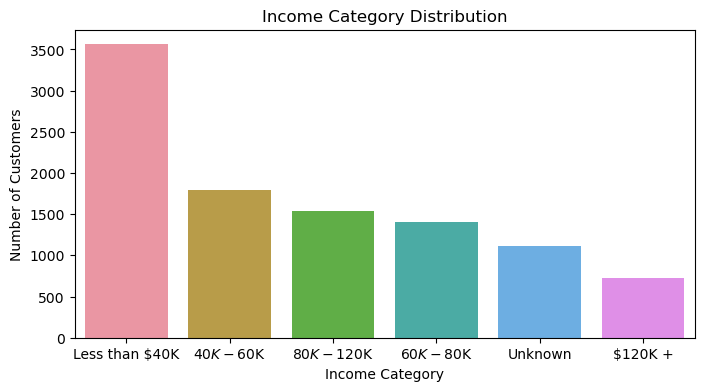

In [38]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Income_Category', data=data, order=data['Income_Category'].value_counts().index)
plt.title('Income Category Distribution')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.show()

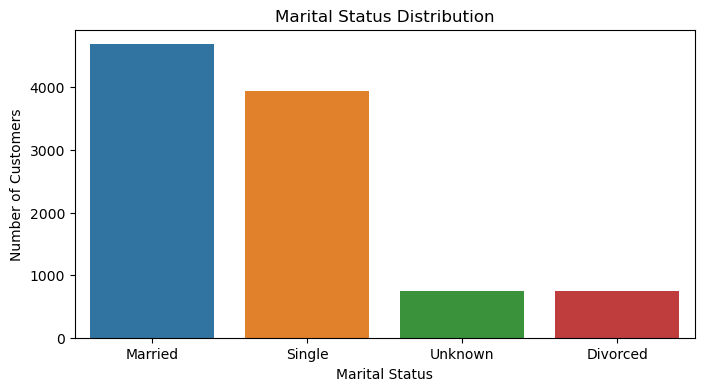

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Marital_Status', data=data, order=data['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

2. Credit Usage Analysis

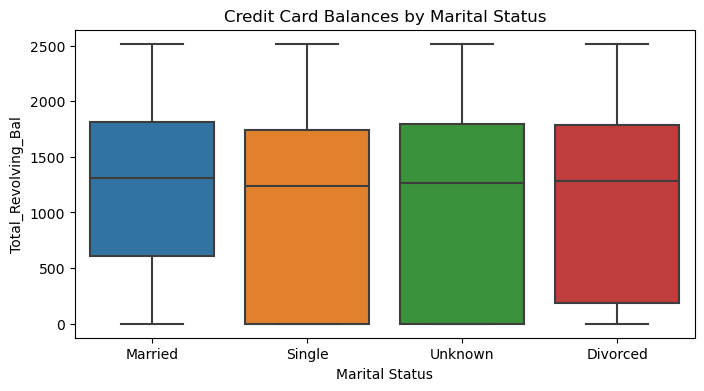

In [15]:
#Credit Card Balances by Marital Status
plt.figure(figsize=(8, 4))
sns.boxplot(x='Marital_Status', y='Total_Revolving_Bal', data=data)
plt.title('Credit Card Balances by Marital Status')
plt.xlabel('Marital Status')
plt.show()

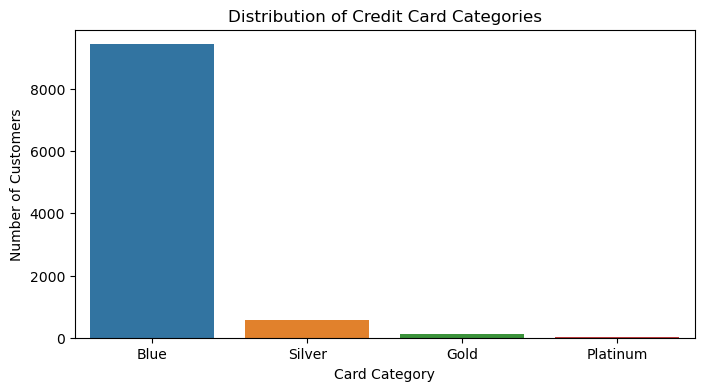

In [16]:
#Credit card usage
plt.figure(figsize=(8, 4))
sns.countplot(x='Card_Category', data=data, order=data['Card_Category'].value_counts().index)
plt.title('Distribution of Credit Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Number of Customers')
plt.show()

Text(0.5, 0, "Interest Variable 'Attrition_Flag'")

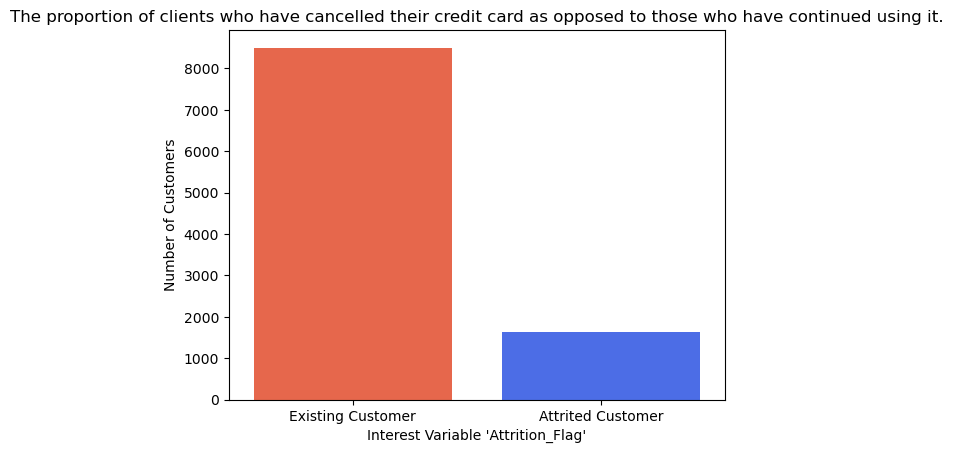

In [17]:
colors = ['#FF5733', '#335EFF']  
sns.set_palette(sns.color_palette(colors))  
sns.countplot(x="Attrition_Flag", data=data)  
plt.title("The proportion of clients who have cancelled their credit card as opposed to those who have continued using it.")
plt.ylabel("Number of Customers")
plt.xlabel("Interest Variable 'Attrition_Flag'")  

One target variable class is noticeably more common than the other, indicating a class imbalance. There are more observations of current customers than non-existing customers in this dataset, which is dominated by the class labeled "Existing Customer." Because models may have a bias in favor of the majority class, this class imbalance may provide difficulties for the other class in some machine learning tasks.

Part 3: Customer Segmentation

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Selecting coloums
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

#Creating a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=numeric_cols)

wcss = []  
silhouette_scores = []

In [19]:
print(silhouette_scores)

[]


We determined the optimal number of clusters by looking at silhouette points for different values ​​of k. 
The silhouette score measures how similar an object is to its cluster compared to other clusters. 
A higher silhouette score means better defined clusters.

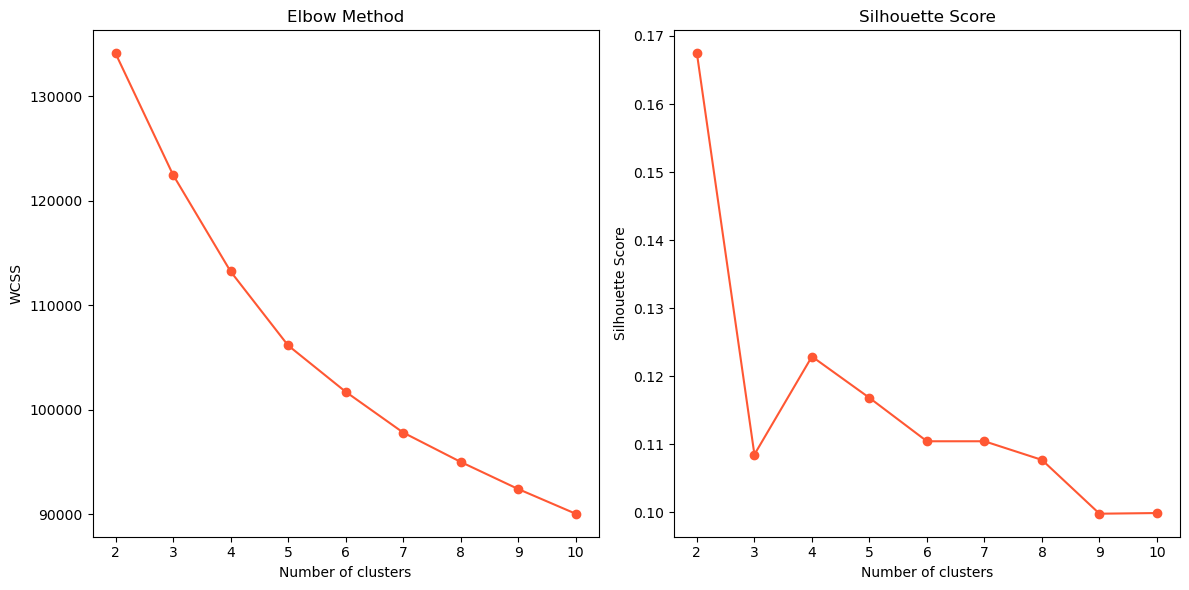

In [20]:
#Testing different numbers of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=15)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

#Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

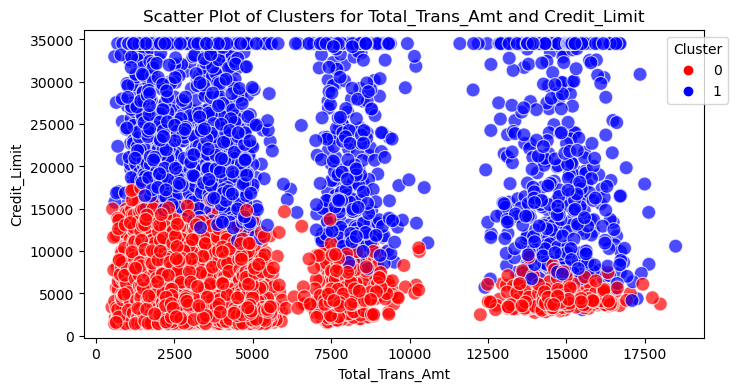

In [31]:
#Using 2 clusters based on silhouette score
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=15)
cluster_labels = kmeans.fit_predict(data_scaled)

data['Cluster_Labels'] = cluster_labels

feature_x = 'Total_Trans_Amt'
feature_y = 'Credit_Limit'

palette = ['red', 'blue']
plt.figure(figsize=(8, 4))
sns.scatterplot(x=feature_x, y=feature_y, hue='Cluster_Labels', data=data, palette=palette, s=100, alpha=0.7)
plt.title('Scatter Plot of Clusters for ' + feature_x + ' and ' + feature_y)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=1)
plt.show()

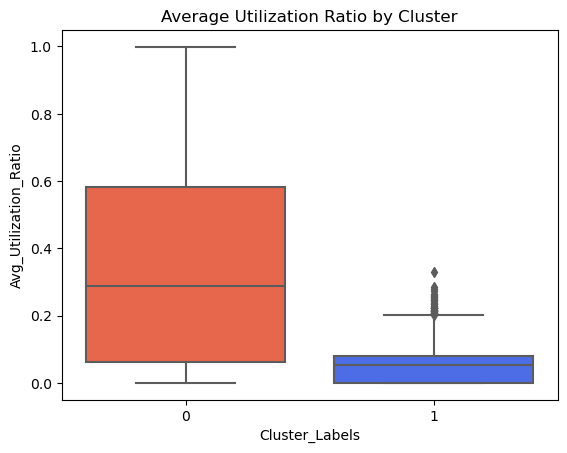

In [26]:
#Insights
sns.boxplot(x='Cluster_Labels', y='Avg_Utilization_Ratio', data=data)
plt.title('Average Utilization Ratio by Cluster')
plt.show()

To understand the characteristics of each cluster, we visualize the distribution of different characteristics between the clusters. This helps identify unique behaviors and patterns within each customer segment..

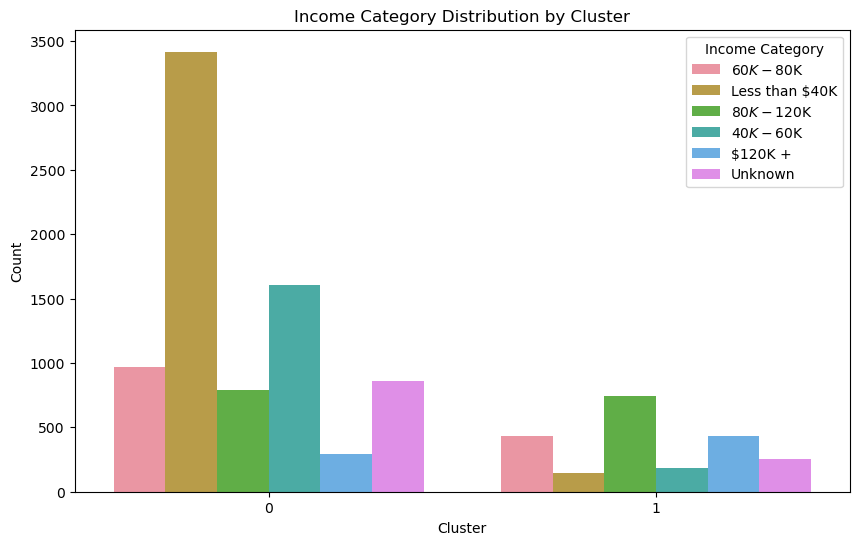

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_Labels', hue='Income_Category', data=data)
plt.title('Income Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Income Category')
plt.show()

Summary of Insights:

Cluster Characteristics:

Cluster 0 represent younger customers with lower average credit limits but higher utilization rates, indicating that they may be more actively using their credit.

Cluster 1 represent older customers with higher credit limits and lower utilization rates, indicating that they may have more financial stability and less credit. 


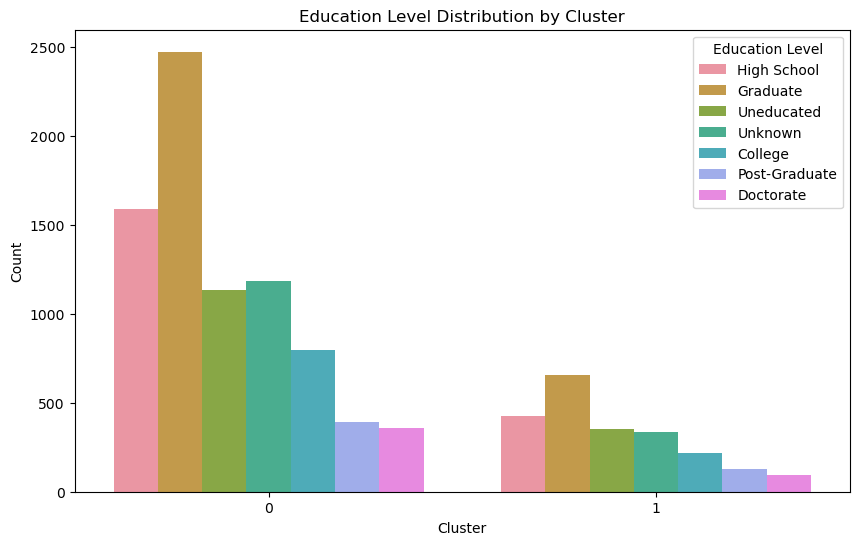

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_Labels', hue='Education_Level', data=data)
plt.title('Education Level Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

Summary of Insights:

Cluster Characteristics:

Cluster 0 represent younger customers with high education level compared to Cluster 1.

Cluster 1 represent older customers with low graduation level compared to Cluster 0.


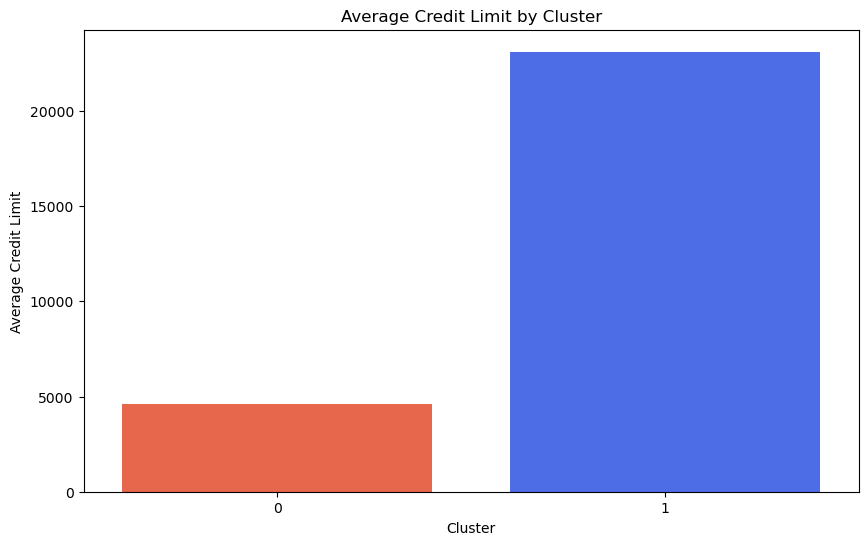

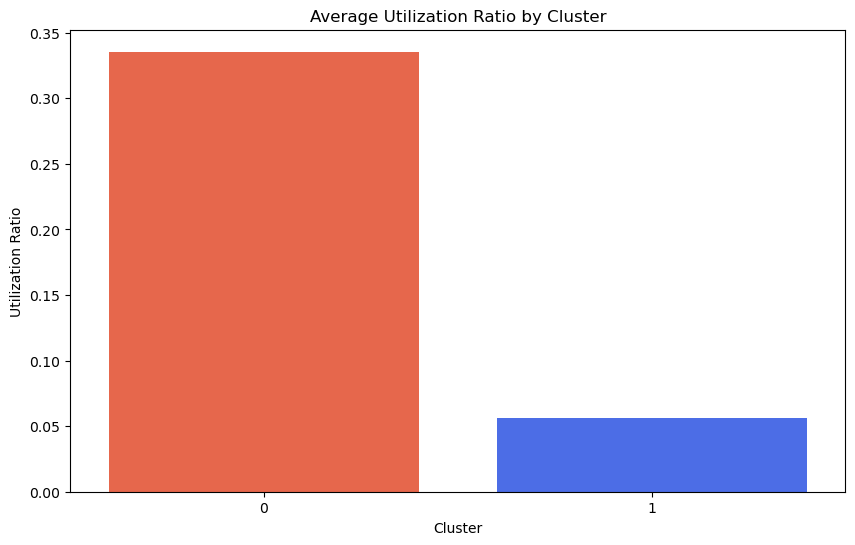

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_Labels', y='Credit_Limit', data=data, estimator=np.mean, errorbar=None)
plt.title('Average Credit Limit by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Credit Limit')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_Labels', y='Avg_Utilization_Ratio', data=data, estimator=np.mean, errorbar=None)
plt.title('Average Utilization Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Utilization Ratio')
plt.show()

The number and frequency of incidents varied between clusters. For example, one cluster may have higher transaction amounts, which means a higher consumption pattern, while another cluster may have more frequent but smaller transaction amounts..

Part 4: Predictive Modeling

For model building namely We'll use two algorithms: Logistic Regression and Random Forest Classifier.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Identifing categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

#Creating transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

#Preparing the features and target
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cluster_Labels'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition_Flag', axis=1)  # Features
y = data['Attrition_Flag']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

#Fiting the models
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

#Evaluating models
print("Logistic Regression Performance")
evaluate_model(lr_pipeline, X_test, y_test)

print("\nRandom Forest Performance")
evaluate_model(rf_pipeline, X_test, y_test)

Logistic Regression Performance
Accuracy: 0.8973346495557749
ROC AUC Score: 0.9140580985757049
Confusion Matrix:
[[ 177  150]
 [  58 1641]]

Random Forest Performance
Accuracy: 0.9624876604146101
ROC AUC Score: 0.9890275445351017
Confusion Matrix:
[[ 271   56]
 [  20 1679]]


Performances:
Logistic regression:
Strengths: simplicity, interpretability and faster training.
Weaknesses: May perform worse on non-linear problems or multi-category functions.

Random Forest:
Strengths: Handles nonlinear data better, tolerates outliers, and generally provides better accuracy.
Weaknesses: More complex, prone to excessive plotting and requires more computing resources..